---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 5 

---

Please write your full name here
- **Name** : "Yousr Ashraf Hejy"

# Clustering

In this assignment, you will be exploring kmeans algorithms for clustering

--------------------

The k-means clustering is first given the wanted number of clusters, say k, as a hyperparameter. Next, to start the algorithm, k points from the data set are chosen randomly as cluster centres. Then the following phases are repeated iteratively:

- any data point is set to belong to a cluster, whose centre is closest to it
- then for each cluster a new centre is chosen as the average of the data points in the cluster
This procedure is repeated until the clusters no longer change. This kind of algorithm is called an Expectation-Maximization (EM) algorithm, which is known to converge.

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

In [ ]:
df = pd.DataFrame(X, columns = ['Feature1', 'Feature2'])
df['Target'] = y
df.head()

,Feature1,Feature2,Target
0,0.084154,0.113341,1
1,1.050915,0.154710,0
2,-0.716555,0.675608,0
3,0.060932,0.926542,0
4,-1.005525,0.336425,0


# Question 0
Set random seed to 47

In [ ]:
np.random.seed(47)

# Question 1
Scatter plot the dataset

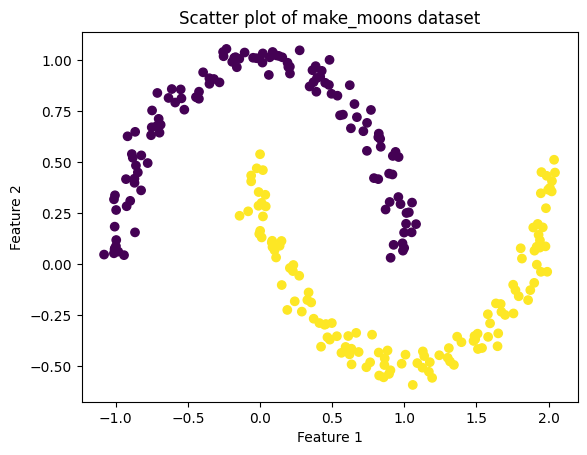

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of make_moons dataset')
plt.show()

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

ANSWER:
the dataset have no circular or spherical clusters, thats why clustering will not perfectly fit the data.

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train SKlearn KMeans model using "k = 2".
4. Scatter plot the data after clustering with colors
5. **Comment on the results.**

ANSWER:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

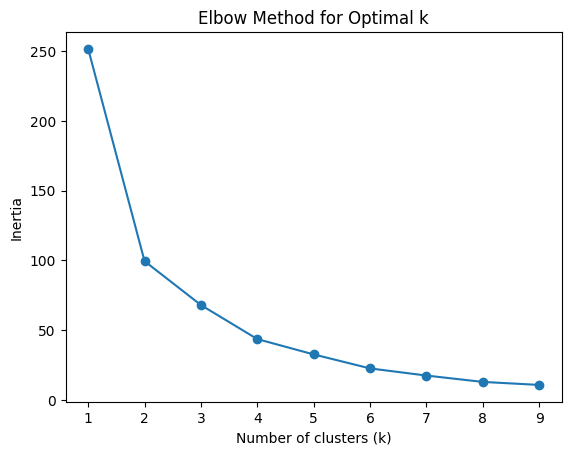

In [ ]:
# Q.3.1 Elbow Method
inertias = []
ks = range(1, 10)
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

# Q.3.2 Elbow Graph
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


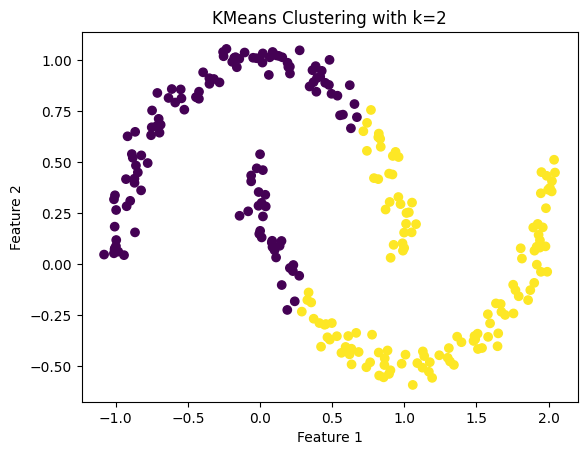

In [ ]:
# Q.3.3 Train SKlearn KMeans model
kmeans_moons = KMeans(n_clusters=2)
kmeans_moons.fit(X)
# Q.3.4 Scatter plot for clustering with colors
# Predictions
labels = kmeans_moons.predict(X)
centroids = kmeans_moons.cluster_centers_
# plot
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with k=2')
plt.show()

Q.3.5 Comment on the results.

Despite the overlapping nature of the data, the data is well separated but with some misclassification that are located near the boundary between the two clusters

- Try DBSCAN algorithm on the same data with eps = 0.3
- Scatter plot the resulting clusters

In [ ]:
from sklearn.cluster import DBSCAN

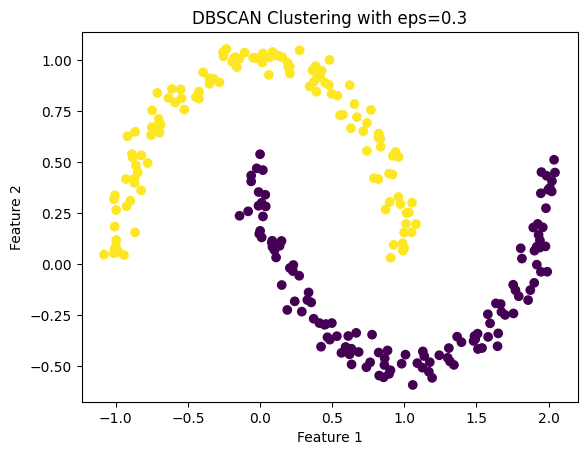

In [ ]:
# Apply DBSCAN 
dbscan = DBSCAN(eps=0.3)
labels = dbscan.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with eps=0.3')
plt.show()

**Compare between DBSCAN and kmeans results on the same data. Why do you think you got those results??**

ANSWER:
It is clear from scatter plot that DBSCAN Algorithm separates the data perfectly where it is able to define the shape of the data and seperate it according to it, while KMeans is barely able separate the two clusters, but alot of points are misclassified.

# Question 4
For the following dataset
1. Run kmeans algorithm clustering using k=2.
3. Plot results of algorithm.
4. Comment on the following
    * Why do kmeans fail to cluster such data?

ANSWER:
the data is formed of elongated linear-like shape and k-mean clustering works well with cicular or sperical data not elongated one cause it dependes on distance algorithm

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


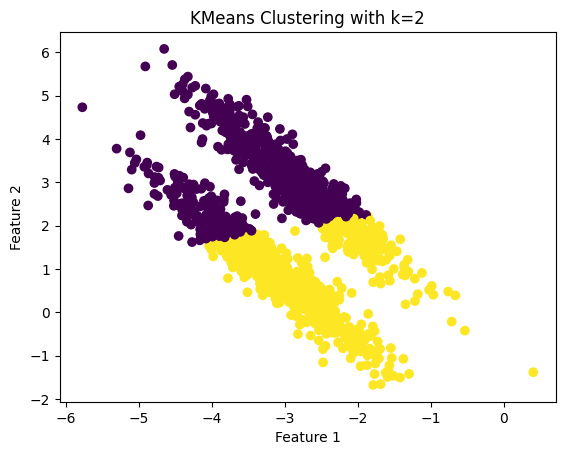

In [ ]:
# Q.4.1 Train SKlearn KMeans model
kmeans_random = KMeans(n_clusters=2)
kmeans_random.fit(X_aniso)
# Q.4.2 Scatter plot 
# Predictions
labels = kmeans_random.predict(X_aniso)
centroids = kmeans_random.cluster_centers_
# plot
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with k=2')
plt.show()

# Question 5
Write your own K-means clustering from scratch, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [ ]:
import numpy as np
def kmean_scratch(num_clusters, x):
    # Initialize cluster centers randomly
    centers = x[np.random.choice(x.shape[0], num_clusters, replace=False)]

    while True:
        # Assign each data point to the nearest cluster center
        distances = np.sqrt(((x - centers[:, np.newaxis])**2).sum(axis=2))
        clusters = np.argmin(distances, axis=0)

        # Update cluster centers to be the mean of the assigned data points
        new_centers = np.array([x[clusters == i].mean(axis=0) for i in range(num_clusters)])

        # Check if the cluster centers have converged
        if np.allclose(centers, new_centers):
            break

        centers = new_centers

    return centers.tolist()

# Question 6
For the following dataset:

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


- Scatter plot the data **without** coloring the points using labels. 
- How many clusters do you see?

ANSWER:
it looks like 3 cluster but the middle one can be formed of 2 clusters that are overlapping, so it will be 4 clusters, the data is also created with 4 centers

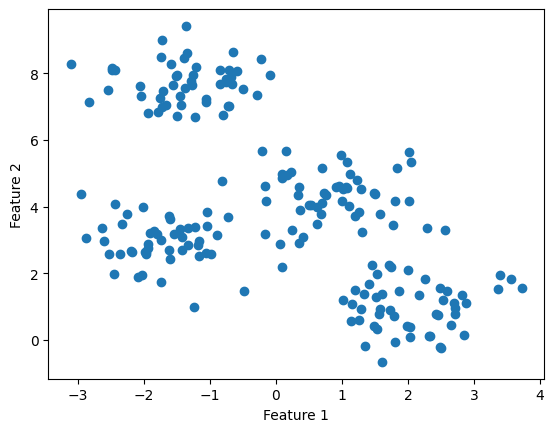

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Question 7

- Use sklearn kmeans to cluster the ABOVE data with k = the number you chose in the above question
    - Print the clusters centers
    - Scatter plot the data and use the labels **predicted** by the model to color the points --> you should have as many colors in the plot as clusters
    - On the same plot, show the cluster centers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


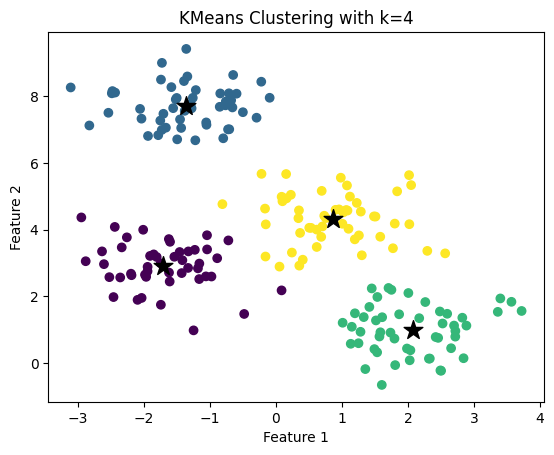

In [ ]:
# clustering
kmeans_blobs = KMeans(n_clusters=4)
kmeans_blobs.fit(X)

# Predictions
y_pred = kmeans_blobs.predict(X)
centroids = kmeans_blobs.cluster_centers_
# plot
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans_blobs.cluster_centers_[:, 0], kmeans_blobs.cluster_centers_[:, 1], marker='*', s=200, c='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with k=4')
plt.show()

In [ ]:
# Print the cluster centers
print('The cluster centers:', kmeans_blobs.cluster_centers_)

The cluster centers: [[-1.70639178  2.9104771 ]
 [-1.36512238  7.70188306]
 [ 2.07464749  0.9869902 ]
 [ 0.86008475  4.31501411]]


- Calculate the accuracy score between kmeans prediction and the true blobs labels

we cannot directly calculate the accuracy score between KMeans predictions and the true blobs labels.

However, we can use external evaluation metrics such as adjusted Rand index (ARI) or normalized mutual information (NMI) to measure the similarity between KMeans predictions and the true labels, assuming that the true labels are known.

In [ ]:
# from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
# # Calculate ARI and NMI scores
# ari = adjusted_rand_score(y, kmeans_blobs.labels_)
# nmi = normalized_mutual_info_score(y, kmeans_blobs.labels_)

# # Print ARI and NMI scores
# print('Adjusted Rand Index:', round(ari*100,2))
# print('Normalized Mutual Information:', round(nmi*100,2))

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score between the KMeans predictions and the true blob labels
accuracy = accuracy_score(y, y_pred)

# Print the accuracy score
print("Accuracy score:", accuracy)

Accuracy score: 0.0


- Why is the accuracy so low?

ANSWER:cause KMeans attempts to group the data into clusters based on the similarity of the data points which may conflict and get away from the true values of data

# Question 8


- Write a function that takes the number of clusters, the true labels, and the model predictions
- The function should return a list **new labels** with length = number of clusters
- The function should modify the predicted label of each cluster to be the **mode** (most common **true** label) among the data points in the cluster
- Pseudocode:
    - For each predicted cluster:
        - Calculate mode of true labels of all points within the cluster
        - The mode is the **new label** for this cluster


In [ ]:
def relabel(n_clusters, true_labels, pred_labels):
    new_labels = []
    for i in range(n_clusters):
        # Get the index of the data in the cluster
        data_indices = np.where(pred_labels == i)[0]
        # Get the true labels of the data 
        data_true_labels = true_labels[data_indices]
        # Calculate the mode of the true labels
        cluster_mode = np.bincount(data_true_labels).argmax()
        new_labels.append(cluster_mode)

    return new_labels

In [ ]:
new_labels = relabel(n_clusters, y, y_pred)
assert len (new_labels) == n_clusters

In [ ]:
# # Generate some random true labels and model predictions
# true_labels = np.random.randint(0, 3, size=50)
# model_predictions = np.random.randint(0, 3, size=50)

# # Update the model predictions with the true labels
# num_clusters = 3
# new_labels = relabel(num_clusters, true_labels, model_predictions)

# # Print the new labels
# print("New labels:")
# print(new_labels)

- Calculate the accuracy score of new labels for **ALL** data after relabeling data

In [ ]:
label_map = dict(zip(np.unique(y_pred), new_labels))

predicted_labels = [label_map.get(label, -1) for label in y_pred]
predicted_labels = [label for label in predicted_labels if label != -1]
accuracy = accuracy_score(y[:len(predicted_labels)], predicted_labels)
print("Accuracy score is ", round(accuracy*100,2))


Accuracy score is  99.0


# Question 9
Write your own K-medoids clustering, where the Euclidian distance is used to evaluate the distance/ similarity between the dataset. The input to this function should be:
- The number of clusters
- The dataset

The output should be:
- The list of cluster centers

In [ ]:
# Calculate the distance
def euclidean_distance(x,y):
    dist_square = 0
    for i in range(len(x)):
        dist_square += (x[i]-y[i])**2
    distance = np.sqrt(dist_square)
    return distance

# check is previos mediods converge with the new ones
def is_converged(new_mediods,mediods):
    return set([tuple(x) for x in new_mediods])  == set([tuple(x) for x in mediods])  

def k_medoids_clustering(k,X,max_iter=300):
    # Initialize cluster centers
    medoids = X[np.random.choice(X.shape[0],k,replace=False)]
    labels=np.full(X.shape[0],-1)
    for iter in range (max_iter):
        for i in range (X.shape[0]):
            distances=[euclidean_distance(X[i],m)for m in medoids]
            labels[i]=np.argmin(distances)
        new_mediods=np.empty_like(medoids)
        for i in range (k):
            cluster=X[labels==i]
            if len(cluster) > 0:
                costs=np.sum([euclidean_distance(x,cluster) for x in cluster],axis=1)
                new_mediods[i]=cluster[np.argmin(costs)]
            else:
                new_mediods[i]=medoids[i]
        # check the convergence
        if is_converged(new_mediods,medoids):
            break
        medoids=new_mediods                

    return medoids,labels



- Apply YOUR k-medoids clustering algorithm with 4 clusters 
- Scatter Plot the points clusters along with the cluster center (use symbols to distinguish the cluster center from cluster point and the color codes to distinguish between the 4 clusters).

- Use the data in the following link: https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

The centers are:
[[ 0.42164405  0.43495275]
 [ 0.95155068  1.25165393]
 [ 0.67158334  0.43495275]
 [-1.31556649 -1.34694075]]


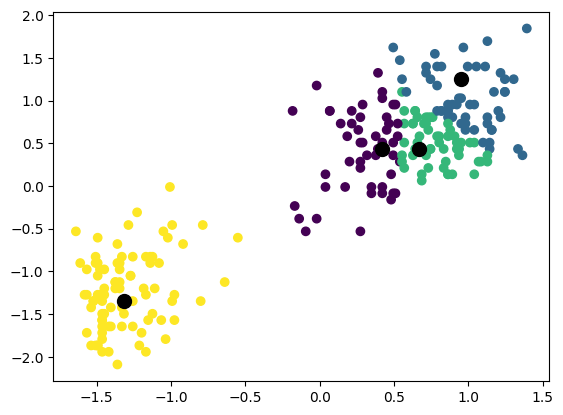

In [ ]:
# read the data
df = np.genfromtxt('/content/faithful.dat', skip_header=26)
mean_df = df[:,1:3]
mean_df = (mean_df-np.mean(mean_df,axis=0))/np.std(mean_df,axis=0)
# get the data mediods
n_clusters = 4
centers, labels = k_medoids_clustering(n_clusters,mean_df)
print(f'The centers are:\n{centers}')
# plotting the clusters along with ceters
plt.scatter(x=mean_df[:,0], y=mean_df[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1],s=100,marker='o',c='black')

